# Convolutional Neural Net with PyTorch

In this notebook, we will implement the Conv Neural Net (CNN) using PyTorch to classify the CIFAR10 dataset.

In [1]:
# import the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Hyper-parameters
n_epoch = 80
batch_size = 8
learning_rate = 0.002
momentum = 0.9

In [4]:
# dataset has PILImage image of range [0, 1].
# We transform them into Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
# import dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# prepare the data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([8, 3, 32, 32]) torch.Size([8])


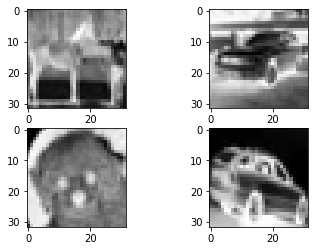

In [8]:
# plot a few samples
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0], cmap='binary')
plt.show()

In [9]:
# implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

In [10]:
# set the loss function and the optimizer
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

epoch 1/80, step 2000/6250, loss = 1.6281
epoch 1/80, step 4000/6250, loss = 1.5049
epoch 1/80, step 6000/6250, loss = 1.9560
epoch 2/80, step 2000/6250, loss = 1.1705
epoch 2/80, step 4000/6250, loss = 1.4657
epoch 2/80, step 6000/6250, loss = 1.4479
epoch 3/80, step 2000/6250, loss = 1.3069
epoch 3/80, step 4000/6250, loss = 1.2849
epoch 3/80, step 6000/6250, loss = 0.9168
epoch 4/80, step 2000/6250, loss = 1.0744
epoch 4/80, step 4000/6250, loss = 1.0082
epoch 4/80, step 6000/6250, loss = 1.0103
epoch 5/80, step 2000/6250, loss = 0.9627
epoch 5/80, step 4000/6250, loss = 1.6524
epoch 5/80, step 6000/6250, loss = 0.8734
epoch 6/80, step 2000/6250, loss = 1.8021
epoch 6/80, step 4000/6250, loss = 1.3351
epoch 6/80, step 6000/6250, loss = 1.0388
epoch 7/80, step 2000/6250, loss = 0.4221
epoch 7/80, step 4000/6250, loss = 1.3026
epoch 7/80, step 6000/6250, loss = 1.1453
epoch 8/80, step 2000/6250, loss = 0.8146
epoch 8/80, step 4000/6250, loss = 0.3949
epoch 8/80, step 6000/6250, loss =

epoch 65/80, step 2000/6250, loss = 0.9236
epoch 65/80, step 4000/6250, loss = 0.4479
epoch 65/80, step 6000/6250, loss = 0.3064
epoch 66/80, step 2000/6250, loss = 0.6039
epoch 66/80, step 4000/6250, loss = 0.4720
epoch 66/80, step 6000/6250, loss = 0.5775
epoch 67/80, step 2000/6250, loss = 0.3399
epoch 67/80, step 4000/6250, loss = 1.2998
epoch 67/80, step 6000/6250, loss = 0.1584
epoch 68/80, step 2000/6250, loss = 0.4840
epoch 68/80, step 4000/6250, loss = 0.5279
epoch 68/80, step 6000/6250, loss = 0.4394
epoch 69/80, step 2000/6250, loss = 1.1907
epoch 69/80, step 4000/6250, loss = 0.9743
epoch 69/80, step 6000/6250, loss = 1.3637
epoch 70/80, step 2000/6250, loss = 1.5170
epoch 70/80, step 4000/6250, loss = 0.8199
epoch 70/80, step 6000/6250, loss = 0.4448
epoch 71/80, step 2000/6250, loss = 0.3442
epoch 71/80, step 4000/6250, loss = 0.9570
epoch 71/80, step 6000/6250, loss = 0.6188
epoch 72/80, step 2000/6250, loss = 1.0691
epoch 72/80, step 4000/6250, loss = 1.0251
epoch 72/80

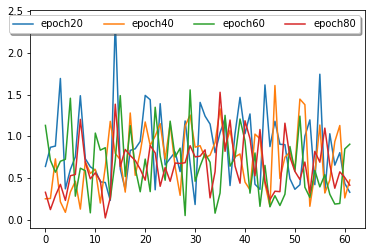

In [11]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(n_epoch):
    loss_list = []
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criteria(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # generate data points for plotting
        if ((epoch+1) % 20 == 0) and ((i+1) % 100 == 0):
            loss_list.append(loss.item())
        
        if (i+1) % 2000 == 0:
            print(f"epoch {epoch+1}/{n_epoch}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

    if ((epoch+1) % 20 == 0):
        plt.plot(loss_list, label="epoch"+str(epoch+1))
        plt.legend(loc=1, mode="expanded", shadow=True, ncol=4)

print("Finished Training")
plt.show()

In [12]:
# test and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy = {acc}")

Accuracy = 55.32
